In [11]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train_1), (x_test, y_test_1) = datasets.mnist.load_data()

In [13]:
print(x_train.shape)

(60000, 28, 28)


In [14]:
print(y_train_1[0])

5


In [15]:
y_train = keras.utils.to_categorical(y_train_1, 10)
y_test = keras.utils.to_categorical(y_test_1, 10)

In [16]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


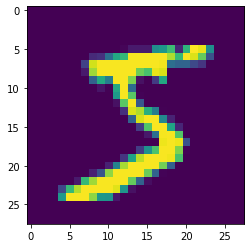

In [17]:
%pylab inline
plt.imshow(x_train[0])

In [18]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [19]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [20]:
#ANN
model = Sequential([Dense(512, input_dim = 784, activation = 'relu'), Dense(265, activation = 'relu'), Dense(124, activation = 'relu'), Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 265)               135945    
                                                                 
 dense_2 (Dense)             (None, 124)               32984     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 572,099
Trainable params: 572,099
Non-trainable params: 0
_________________________________________________________________


In [21]:
opt = optimizers.Adam(0.001) #Learning rate

In [22]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics = ['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs = 5, batch_size = 10)

Epoch 1/5
6000/6000 [==============================] - 28s 5ms/step - loss: 0.0456 - accuracy: 0.9867
Epoch 2/5
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0437 - accuracy: 0.9875
Epoch 3/5
6000/6000 [==============================] - 28s 5ms/step - loss: 0.0395 - accuracy: 0.9900
Epoch 4/5
6000/6000 [==============================] - 28s 5ms/step - loss: 0.0357 - accuracy: 0.9903
Epoch 5/5
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0361 - accuracy: 0.9904


In [25]:
test_loss, test_accuracy = model.evaluate(x = x_test, y = y_test)
print("The test accuracy is:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1444 - accuracy: 0.9785
The test accuracy is: 0.9785000085830688


In [26]:
model.save('the_final_ANN_model.h5')